In [67]:
import numpy as np
import sunpy
import sunpy.map
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.visualization import AsinhStretch, ImageNormalize

In [3]:
phi_bmag_map = sunpy.map.Map("../../src/PHI/20221024/solo_L2_phi-hrt-bmag_20221024T191503_V01.fits")
phi_binc_map = sunpy.map.Map("../../src/PHI/20221024/solo_L2_phi-hrt-binc_20221024T191503_V01.fits")
phi_bazi_map = sunpy.map.Map("../../src/PHI/20221024/solo_L2_phi-hrt-bazi_20221024T191503_V01.fits")

In [17]:
Txshift_phi_hmi, Tyshift_phi_hmi = -7.56808*u.arcsec, -67.6155*u.arcsec

In [18]:
phi_bmag_map = phi_bmag_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)
phi_binc_map = phi_binc_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)
phi_bazi_map = phi_bazi_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)

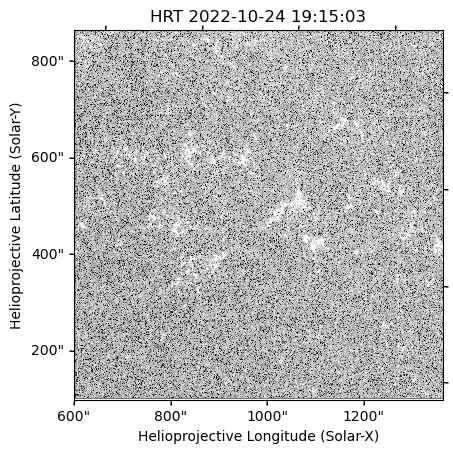

In [68]:
phi_bmag_map.plot(vmin=0, vmax=500, norm=ImageNormalize(stretch=AsinhStretch()))

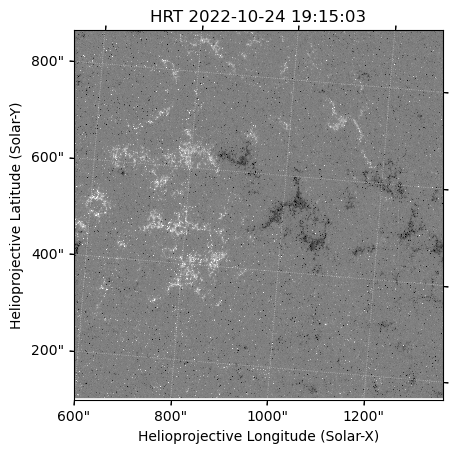

In [22]:
phi_binc_map.plot(vmin=0,vmax=180)

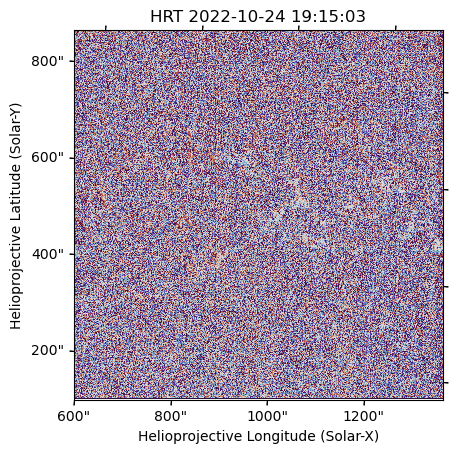

In [75]:
phi_bazi_map.plot(vmin=0,vmax=180, interpolation='none', cmap='twilight_shifted')

(array([31827., 13688., 14033., 14500., 14904., 15665., 16392., 17102.,
        17550., 18403., 19120., 19855., 21257., 21824., 22623., 23620.,
        24478., 25648., 26592., 27170., 28421., 28747., 28653., 29383.,
        30087., 30020., 30463., 30715., 30479., 31001., 31217., 31265.,
        31146., 31054., 30989., 31120., 31070., 31045., 31243., 31404.,
        30980., 30899., 31134., 30926., 31220., 31027., 31024., 31320.,
        31497., 31625., 31398., 31595., 31283., 31388., 31368., 31511.,
        31605., 31229., 30684., 30706., 30020., 29707., 29115., 28689.,
        27747., 27111., 25944., 25476., 24685., 23621., 22703., 21964.,
        20977., 20190., 19478., 18315., 17772., 16940., 16192., 15681.,
        15386., 14665., 14029., 13665., 13492., 12978., 12739., 12583.,
        12385., 12219., 12068., 11975., 12059., 11959., 12247., 12063.,
        12103., 12372., 12697., 13093.]),
 array([1.56558817e-04, 1.80015397e+00, 3.60015130e+00, 5.40014887e+00,
        7.20014620e+00

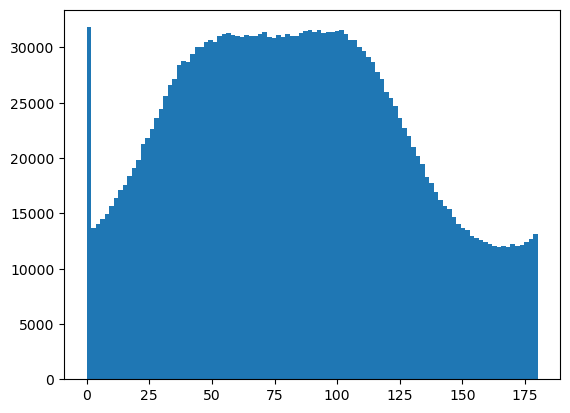

In [76]:
plt.hist(phi_bazi_map.data.flatten(), bins=100)

In [63]:
xcen_long = np.rad2deg(np.arcsin(phi_bmag_map.meta['crval1']/phi_bmag_map.meta['rsun_arc']))
ycen_lat = np.rad2deg(np.arcsin(phi_bmag_map.meta['crval2']/phi_bmag_map.meta['rsun_arc']))
xcen_long, ycen_lat

(25.788996807915712, 10.701638447248008)

In [66]:
with open("../../src/PHI/20221024/phi_20221024_map.dat", "w") as f:
    np.savetxt(f, np.array([phi_bmag_map.data.T.shape]), fmt='%10d',)
    np.savetxt(f, np.array([[phi_bmag_map.meta['cdelt1'], phi_bmag_map.meta['cdelt2']]]), fmt='%10f',)
    np.savetxt(f, np.array([[phi_bmag_map.meta['solar_b0'], phi_bmag_map.meta['solar_p0'], phi_bmag_map.meta['rsun_arc']]]), fmt='%10.2f',)
    np.savetxt(f, np.array([[xcen_long, ycen_lat]]), fmt='%10.2f',)
    np.savetxt(f, phi_bmag_map.data.T.reshape(-1,6), fmt='%10.2f',)
    np.savetxt(f, phi_binc_map.data.T.reshape(-1,6), fmt='%10.1f',)
    np.savetxt(f, phi_bazi_map.data.T.reshape(-1,6) - phi_bazi_map.meta['crota'], fmt='%10.1f',)